## A. The goal of this part is to implement the Huffman coding and how it can be enhanced to reach the optimal bound.

In [1]:
from __future__ import division
import numpy as np
import scipy as sp
import pylab as pl
import scipy.signal as sg
import matplotlib.pyplot as plt

### The definition of the entropy: Given a probability vector on a finite space $\Omega = \{\omega_1,\ldots,\omega_n\}$ denoted by $p = (p_1,\ldots,p_n)$. The entropy is the quantity defined by $H(p) = -\sum_{i = 1}^n p_i \log(p_i)$. It's a concave function which is positive since $p_i \in [0,1]$ and thus $\log(p_i) \leq 0$.

In [2]:
def ShannonEntropy(p):
    return -np.sum(p*np.log2(np.maximum(p,1e-15)))

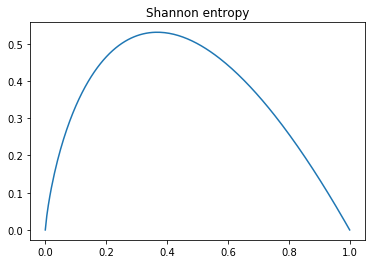

In [3]:
n = 200
x = np.linspace(1e-10,1,n)
plt.title("Shannon entropy")
plt.plot(x,-x*np.log2(x))

## In what follows, we consider that the $\omega_i$ are letters of some alphabet which have a frequency of appearance of $p_i$.

In [4]:
## Generate a random text according to the frequencies.
n = 512; p = 0.3
x = (np.random.rand(n) > p) + 1
h = [np.sum(x == 1), np.sum(x == 2)]
h = h/np.sum(h)
print(h)
print("Empirical p = %.2f" %h[0])

[0.32421875 0.67578125]
Empirical p = 0.32


In [5]:
e = ShannonEntropy(h)
print("Entropy = %.2f" %e)

Entropy = 0.91


In [6]:
### Definition of the probability h
h = [.1, .15, .4, .15, .2]
print(ShannonEntropy(h))

2.1464393446710153


### We use a python library to represent a binary tree. We assume that the tree is coded in the following way, here is an example, $(a,((b,c),(d,e))$.

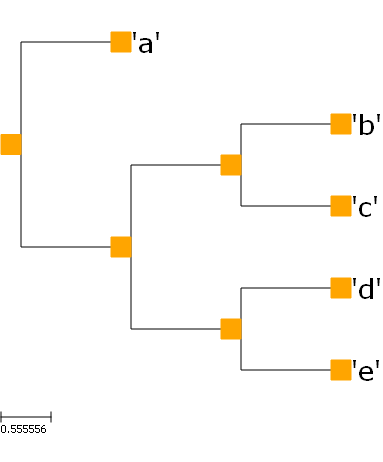

In [7]:
## import ete3 using if you have conda: 
## conda install -c etetoolkit ete3
## otherwise try: pip install ete3
from ete3 import Tree, TreeStyle , NodeStyle, AttrFace, faces
## Define the tree
T = ("a",(("b","c"),("d","e")))

t = Tree(str(T)+";")

ts = TreeStyle()
#ts.rotation = 90
ts.scale = 90
ts.branch_vertical_margin = 50 # 10 pixels between adjacent branches
ts.show_leaf_name = False #

nstyle = NodeStyle()
nstyle["shape"] = "square"
nstyle["size"] = 20
nstyle["fgcolor"] = "orange"

for n in t.traverse():
    n.set_style(nstyle)

for node in t.iter_leaves():
    node.add_face(AttrFace("name", fsize=20), column=0)  
    
t.render("%%inline", tree_style = ts)

### Q1. Write a function that generates the Huffman tree with the probability $h$ as input. Plot the tree with the function above. 

h =  [('A', 0.1), ('B', 0.15), ('C', 0.4), ('D', 0.15), ('E', 0.2)]
Corresponding tree:  ('C', (('A', 'B'), ('D', 'E')))
2


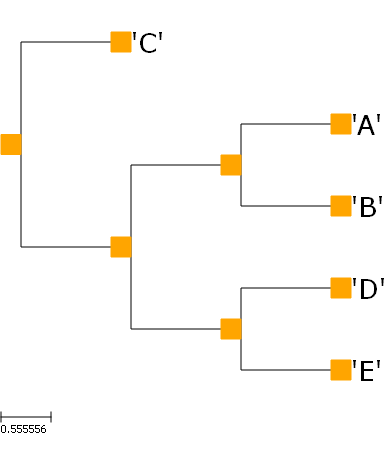

In [42]:
def prepareGraph(t):
    ts = TreeStyle()
    #ts.rotation = 90
    ts.scale = 90
    ts.branch_vertical_margin = 50 # 10 pixels between adjacent branches
    ts.show_leaf_name = False #

    nstyle = NodeStyle()
    nstyle["shape"] = "square"
    nstyle["size"] = 20
    nstyle["fgcolor"] = "orange"

    for n in t.traverse():
        n.set_style(nstyle)

    for node in t.iter_leaves():
        node.add_face(AttrFace("name", fsize=20), column=0)  
    
    return t, ts

## Create the tree as a list.
P = [.1, .15, .4, .15, .2]
h = [(chr(65 + i), P[i]) for i in range(len(P))]
def createTree(h, probas = True):
    if(len(h) == 1):
        return h

    h.sort(key = lambda x:x[1])

    p = h[0][1] + h[1][1] # take first two lowest probabilties and concatenante them
    a = (h[0], h[1]) if probas else (h[0][0], h[1][0]) # do the same for their values
    h = [(a, p)] + h[2:] # add (a, p) to the beginnig of the list h
    
    return createTree(h, probas)

print("h = ", h)
T = createTree(h, False)[0][0]
print("Corresponding tree: ", T)

t = Tree(str(T)+";")
t, ts = prepareGraph(t)
t.render("%%inline", tree_style = ts)


### Q2. Write the function HuffmanGencode which computes the Huffman code of an element in $0,1,2,3,4$  and print it.

In [120]:
def getCode(root, key, path):
    if (len(root) == 1 and root != key):
        return False

    # Key found
    if (root == key): 
        return True

    # Required node is inside left subtree
    if getCode(root[0], key, path):
        path.append(0)
        return True

    # Required node is inside right subtree
    if getCode(root[1], key, path):
        path.append(1)
        return True

    return False
    
def HuffmanGencode(Tree, length):
    codes = {}
    keys = [chr(65 + c) for c in range (0, length)]
    for i, key in enumerate(keys):  
        pathCode = []
        getCode(Tree, key, pathCode)
        pathCodeStr = ""
        for p in pathCode:
            pathCodeStr += str(p)
        pathCodeStr = pathCodeStr[::-1]
        codes[key] = pathCodeStr
    return codes    

codes = HuffmanGencode(T, 5)
print(codes)

['A', 'B', 'C', 'D', 'E']
{'A': '100', 'B': '101', 'C': '0', 'D': '110', 'E': '111'}


### Q3. Write a function that generates a random sequence of numbers between $0$ and $4$ according to the probability $h$.

In [79]:
from numpy import random

def RandGen(p, number):
    return random.choice([0, 1, 2, 3, 4], p=p, size=number)

x = RandGen(P, 512)
print(x)
#print([chr(65 + m) for m in x])



[4 2 1 2 2 0 3 3 4 4 0 1 0 1 2 2 2 3 2 0 3 1 2 2 0 2 4 1 3 2 4 4 2 2 2 2 0
 1 4 1 3 2 2 2 2 2 3 2 2 1 4 4 2 1 3 4 0 1 1 2 3 1 3 0 1 4 4 2 0 1 1 4 0 4
 0 2 2 4 0 2 4 4 2 4 2 0 1 2 3 3 1 0 0 4 2 2 1 2 2 2 2 2 2 3 0 2 2 2 2 4 2
 4 1 4 4 4 2 1 4 3 3 2 4 3 2 1 4 2 2 2 4 0 4 4 0 3 1 2 2 1 0 2 2 3 3 3 0 1
 4 3 1 4 4 2 0 3 3 2 4 1 2 2 4 1 1 2 1 0 3 4 0 4 0 1 4 0 3 3 1 2 3 2 4 4 4
 1 2 2 2 3 0 3 1 4 1 0 0 2 0 2 2 2 3 4 1 4 2 4 3 4 4 0 3 2 4 1 4 3 3 2 2 0
 2 3 0 0 4 2 2 1 2 2 4 1 4 2 4 4 1 4 2 1 4 1 2 4 4 4 4 3 4 2 0 2 3 4 4 3 2
 2 4 2 3 2 0 2 0 0 2 2 2 3 1 2 4 2 1 2 3 3 2 2 3 3 1 2 3 3 1 4 3 2 3 3 2 0
 0 3 2 1 3 2 2 0 4 2 4 2 2 1 1 2 2 4 3 2 3 3 4 2 0 0 4 0 4 3 4 2 2 1 1 2 1
 4 4 3 3 2 3 2 3 2 2 2 3 4 2 4 0 0 2 2 2 3 3 2 2 1 2 4 4 4 3 3 1 2 2 2 2 2
 2 3 4 3 1 4 2 4 1 4 3 4 3 4 1 3 1 2 0 2 0 4 3 2 4 2 2 3 0 3 1 2 0 2 2 4 4
 4 3 2 3 4 4 2 0 4 1 4 1 3 2 1 1 1 3 1 2 3 2 2 4 2 2 2 0 0 2 4 3 3 4 2 2 0
 1 2 2 2 2 2 2 2 4 1 3 4 2 2 2 2 4 4 2 2 2 1 2 1 3 2 3 3 2 1 2 3 2 0 1 4 0
 2 2 3 4 2 2 4 2 2 1 1 1 

### Q4. Write a function which maps a random sequence as above into its Huffman code and test it.

In [70]:
def CodeHuffman(x,codes):
    result = ""
    for e in x:
        result += codes[chr(65 + e)]
    return result

In [69]:
code = CodeHuffman(x,codes)
print(code)

1100111100101100011110001100011011101010000011110111010010001011011011011110011010101111111000101101010000000110110100011100000101110011111110010011110100111110011110011001001101001010111111101101111110101001001110001101010011001011001101100101111000100001110011000110100011011111101110000000101100110010111110101011101100111101101000100111000011111001110111101011101101100001111011111111111110101100011110111011010111011011011011011110111000001111001111110011010111101101101010111111000101000001001101100010111111110111001001100001110010100111001110011001001100001110100010010001001101101110101001101110001000001100011101000101110111100100111011100110101111111100110111000111111100011110110100011110010010110100011101011110010111010011011110111110010100011111011000111100111010100000110011111100101110100011101110000100101100100000100101000010101111110101100111101010110100010001111111101111001011000101110100111000111001011001001000111001110111001000111001111101110111100110010101010011000111101111

### Q5. Compare with the Shannon bound.
### Q6. Write below a function that decodes the Huffman code and test it on a random sequence. Check that it is the inverse of the coding map.

In [85]:
# Q5
def HuffmanLenght(p, codes):
    codeLength = 0
    for id, prob in enumerate(p):
        codeLength += prob * len(codes.get(chr(65 + id)))
    return codeLength

print("Shanonn Entropy:", ShannonEntropy(P))
print("Longueur du code de Huffmam: ", HuffmanLenght(P, codes))

#Q6
# {'A': '100', 'B': '101', 'C': '0', 'D': '110', 'E': '111'}
def DecodeHuffman(code, T):
    result = ""
    root = T
    current = root
    for bit in code:
        if bit == '1': current = current[1] # Right
        elif bit == '0': current = current[0] # Left
        
        # Letter found
        if len(current) == 1:
            result += current
            current = root
    return result
            
print(DecodeHuffman(code, T))



Shanonn Entropy: 2.1464393446710153
Longueur du code de Huffmam:  2.2
DCEABACEACDCCDECBCCCCCEBDAACBBBBECCDBCEEACBBCACCCCCDDACECCCCCBDCEEAAEBCCEDCEADCADABCEEBBEDBCCAECCCDBCCDCBADDCBECCCACCECCDCCDACDEECECCCCCCCBADCBEBCBDDCEBBCCCAECCCCEDCECEBCECDDCCCEBEEEECBACEBDDBDDDDDEBDCCCCEAEECCDBECDDBCEECCCBCCCCCADDCCBEEBDCADCCCECCBCCECCECCDCADCCCECACAACADDECBCCDECCCACCCDCCECACBDEAAECECCDBEEADECCCEEACEBBCCCEAABBCCCECBECCBDADEBEABCCCEDDCCEAECBCCCCCDCEECCBDACECECCCCABAACCCABCCCCBCEECBAEBCBBCCCACEEDEABACBDAECCCECCBAAACECCECECCACECCEDECEADCBCBCCDCCEBECDEAEEECEBBBECDCAEEECECADCBECCDEEDBBBCDCECCD


## Block Huffman coding to reach better performances. 
### We consider a probability as below on an alphabet of two letters $a,b$.

### Q7: Compute the entropy associated with this probability and generalize for an alphabet described by blocks of $k$ letters.

In [121]:
import itertools

def CreateBlocks(p, k):
  alphabet = [(chr(65 + i), p[i]) for i in range(len(p))]
  return list(itertools.product(alphabet, repeat=k))

def CreateBlockTree(p, k):
    # [A, B] --> [AA, AB, BB, BA]
    blocks = CreateBlocks(p, k)
    print(blocks)

    tree = []
    keys = []
    for block in blocks: # AA BB AB BA
      #print(block)
      prob = 1
      value = ""
      for e in block: # A A
        #print(e)
        prob *= e[1]
        value += e[0]
      tree.append((prob, value))
      keys.append(value)
    return tree, keys


t = .12
h = [t, 1-t]
n = 20000
x = (np.random.rand(n) > t) + 1

tree, keys = CreateBlockTree(h, 2)
print(tree)
print(keys)


[(('A', 0.12), ('A', 0.12)), (('A', 0.12), ('B', 0.88)), (('B', 0.88), ('A', 0.12)), (('B', 0.88), ('B', 0.88))]
[(0.0144, 'AA'), (0.1056, 'AB'), (0.1056, 'BA'), (0.7744, 'BB')]
['AA', 'AB', 'BA', 'BB']


In [122]:
def HuffmanGencodeBlocks(Tree, keys):
    codes = {}
    for i, key in enumerate(keys):  
        pathCode = []
        getCode(Tree, key, pathCode)
        pathCodeStr = ""
        for p in pathCode:
            pathCodeStr += str(p)
        pathCodeStr = pathCodeStr[::-1]
        codes[key] = pathCodeStr
    return codes  

blockCodes = HuffmanGencodeBlocks(tree, keys)
print(blockCodes)

TypeError: object of type 'float' has no len()

### Q7bis. Compare the length of the Huffman code and the Shannon bound. How to explain the difference ? In order to improve the result, we use Huffman coding on blocks of length $k$. 

### Q8. Write a code that takes as input a sequence of length $k$ of letters and associate a binary code. Then, write a function that takes as inputs a random sequence its code by block of length $k$. We assume that the length is a multiple of $k$.

In [90]:

def CodeBlocks(x):
    return 0
def GenNewCode(x):
    return 0

### Q9. Write a function that gives the empirical probability of the message encoded by $k$-blocks.

In [ ]:
def EstimateProbabilites(code,taille_blocs):
    return 0

### Q10. Given a random sequence generated from the probability $h$, plot the performance of the Huffman code (length of the code - Shannon bound) in terms of $k$ the block length. Comment.

# B. The goal of this part is to explore implementations of a FIR or an IIR.

## Q1. Implement an ideal low pass filter using Fourier transform in 1D:
### Compute the inverse FFT of a low pass filter and cut it with a window that will be passed in argument. 

## Q2. Implement an IIR filter defined by its numerator which will be set to a  constant $b$ and its denominator which will be set to $1-az^{-1}$. 
### What can you say about the range of the parameter $a$ in order to obtain a stable filter. 
### Experimentally, determine the ranges of $a$ to get respectively a low-pass filter and a high-pass filter. Give a theoretical explanation.

## In the following, we are given an electrocardiogram. We plot it as a function of time and we 

In [ ]:
### load the data which is an electrocardiogram which is sampled at 360Hz
ecg = sp.misc.electrocardiogram()
### Different plots.
fs = 360.0
### Since it is sampled at 360Hz, recall that Hz is the number of cycle per second, then the
### time is obtained as follows:
time = np.arange(ecg.size) / fs
### simple plot.
plt.plot(time, ecg)
plt.xlabel("time in s")
plt.ylabel("ECG in mV")
plt.xlim(9, 10.2)
plt.ylim(-1, 1.5)
plt.show()
print("time min", time[0])
print("time max", time[-1])

In [ ]:
### Use the scipy function to get the power spectrum of the signal.
f, Pxx = sg.welch(ecg, fs=fs, nperseg=2048, scaling="spectrum")
plt.semilogy(f, Pxx)
plt.xlabel("Frequency in Hz")
plt.ylabel("Power spectrum of the ECG in mV**2")
plt.xlim(f[[0, -1]])
plt.show()

### Q3. Estimate the number of heartbeats in the following electrocardiogram and estimate the mean value of the interval between two heartbeats. You can use the method of your choice. A possible method consists in using a band pass filter and then extract the maximum values of the filtered signal.